In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import urllib.request

In [2]:
import sys
sys.setrecursionlimit(1000000)

In [3]:
urllib.request.urlretrieve("https://github.com/ajinkyaT/CNN_Intent_Classification/raw/master/data/train_text.npy", filename="train_text.npy")
urllib.request.urlretrieve("https://github.com/ajinkyaT/CNN_Intent_Classification/raw/master/data/test_text.npy", filename="test_text.npy")
urllib.request.urlretrieve("https://github.com/ajinkyaT/CNN_Intent_Classification/raw/master/data/train_label.npy", filename="train_label.npy")
urllib.request.urlretrieve("https://github.com/ajinkyaT/CNN_Intent_Classification/raw/master/data/test_label.npy", filename="test_label.npy")

('test_label.npy', <http.client.HTTPMessage at 0x7f2f656d3240>)

In [4]:
old = np.load
np.load = lambda *a,**k: old(*a,allow_pickle=True,**k)

In [5]:
intent_train = np.load(open('train_text.npy', 'rb')).tolist()

In [6]:
label_train = np.load(open('train_label.npy', 'rb')).tolist()

In [7]:
intent_test = np.load(open('test_text.npy', 'rb')).tolist()

In [8]:
label_test = np.load(open('test_label.npy', 'rb')).tolist()

In [9]:
print('훈련용 문장의 수 :', len(intent_train))
print('훈련용 레이블의 수 :', len(label_train))
print('테스트용 문장의 수 :', len(intent_test))
print('테스트용 레이블의 수 :', len(label_test))

훈련용 문장의 수 : 11784
훈련용 레이블의 수 : 11784
테스트용 문장의 수 : 600
테스트용 레이블의 수 : 600


In [10]:
print(intent_train[:5])
print(label_train[:5])

['add another song to the cita rom ntica playlist', 'add clem burke in my playlist pre party r b jams', 'add live from aragon ballroom to trapeo', 'add unite and win to my night out', 'add track to my digster future hits']
['AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist']


In [11]:
print(intent_train[2000:2002])
print(label_train[2000:2002])

['please book reservations for 3 people at a restaurant in alderwood manor', 'book a table in mt for 3 for now at a pub that serves south indian']
['BookRestaurant', 'BookRestaurant']


In [12]:
print(intent_train[10000:10002])
print(label_train[10000:10002])

['when is blood and ice cream trilogie playing at the nearest movie theatre \\?', 'show movie schedules']
['SearchScreeningEvent', 'SearchScreeningEvent']


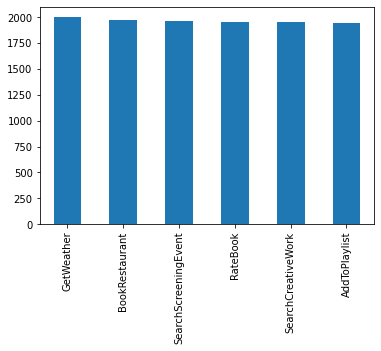

In [13]:
temp = pd.Series(label_train)
temp.value_counts().plot(kind = 'bar')

In [15]:
#LabelEncoder객체 생성
idx_encode = preprocessing.LabelEncoder()
#label encoder 훈련데이터에 fitting : 레이블 인코딩을 통해 레이블에 고유한 정수 지정
idx_encode.fit(label_train)

LabelEncoder()

In [16]:
label_train[:3]

['AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist']

In [17]:
#레이블 인코딩 : 레이블을 고유한 정수로 변환 (transform사용)
label_train = idx_encode.transform(label_train)
label_test = idx_encode.transform(label_test)

In [18]:
label_train[:3]

array([0, 0, 0])

In [19]:
idx_encode.classes_

array(['AddToPlaylist', 'BookRestaurant', 'GetWeather', 'RateBook',
       'SearchCreativeWork', 'SearchScreeningEvent'], dtype='<U20')

In [20]:
idx_encode.transform(list(idx_encode.classes_))

array([0, 1, 2, 3, 4, 5])

In [21]:
label_idx = dict(zip(list(idx_encode.classes_), idx_encode.transform(list(idx_encode.classes_))))
print(label_idx)

{'AddToPlaylist': 0, 'BookRestaurant': 1, 'GetWeather': 2, 'RateBook': 3, 'SearchCreativeWork': 4, 'SearchScreeningEvent': 5}


In [22]:
print(intent_train[:5])
print(label_train[:5])

['add another song to the cita rom ntica playlist', 'add clem burke in my playlist pre party r b jams', 'add live from aragon ballroom to trapeo', 'add unite and win to my night out', 'add track to my digster future hits']
[0 0 0 0 0]


In [23]:
print(intent_test[:5])
print(label_test[:5])

["i 'd like to have this track onto my classical relaxations playlist", 'add the album to my flow espa ol playlist', 'add digging now to my young at heart playlist', 'add this song by too poetic to my piano ballads playlist', 'add this album to old school death metal']
[0 0 0 0 0]


In [25]:
#tokenize객체 생성
tokenizer = Tokenizer()
#훈련데이터에대해 토큰화 진행
tokenizer.fit_on_texts(intent_train)
#자연어 데이터를 정수 인코딩
sequences =tokenizer.texts_to_sequences(intent_train)
sequences[:5] # 상위 5개 샘플 출력

[[11, 191, 61, 4, 1, 4013, 1141, 1572, 15],
 [11, 2624, 1573, 3, 14, 15, 939, 82, 256, 188, 548],
 [11, 187, 42, 2625, 4014, 4, 1968],
 [11, 2626, 22, 2627, 4, 14, 192, 27],
 [11, 92, 4, 14, 651, 520, 195]]

In [26]:
word_index = tokenizer.word_index
word_index

{'the': 1,
 'a': 2,
 'in': 3,
 'to': 4,
 'for': 5,
 'of': 6,
 'at': 7,
 'i': 8,
 'is': 9,
 'book': 10,
 'add': 11,
 'what': 12,
 'find': 13,
 'my': 14,
 'playlist': 15,
 'this': 16,
 '6': 17,
 'movie': 18,
 'me': 19,
 'rate': 20,
 'weather': 21,
 'and': 22,
 'be': 23,
 'show': 24,
 'give': 25,
 'restaurant': 26,
 'out': 27,
 'will': 28,
 'it': 29,
 'on': 30,
 'current': 31,
 'stars': 32,
 'forecast': 33,
 'points': 34,
 'playing': 35,
 'can': 36,
 'table': 37,
 'want': 38,
 'like': 39,
 "'s": 40,
 'movies': 41,
 'from': 42,
 'album': 43,
 'now': 44,
 'that': 45,
 'need': 46,
 '1': 47,
 'called': 48,
 'one': 49,
 'schedule': 50,
 'are': 51,
 'theatres': 52,
 'with': 53,
 'you': 54,
 'please': 55,
 "'d": 56,
 '2': 57,
 'house': 58,
 'four': 59,
 'time': 60,
 'song': 61,
 'reservation': 62,
 'by': 63,
 '4': 64,
 '3': 65,
 'where': 66,
 'novel': 67,
 'get': 68,
 'rating': 69,
 'put': 70,
 'two': 71,
 'three': 72,
 '5': 73,
 'people': 74,
 'animated': 75,
 'five': 76,
 'times': 77,
 'schedu

In [27]:
vocab_size = len(word_index) + 1
print('단어 집합(Vocabulary)의 크기 :',vocab_size)

단어 집합(Vocabulary)의 크기 : 9870


문장의 최대 길이 : 35
문장의 평균 길이 : 9.364392396469789


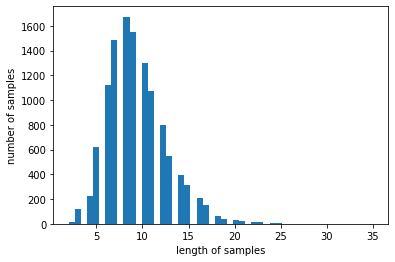

In [28]:
print('문장의 최대 길이 :',max(len(l) for l in sequences))
print('문장의 평균 길이 :',sum(map(len, sequences))/len(sequences))
plt.hist([len(s) for s in sequences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [29]:
max_len = 35
#훈련데이터에대해 패딩 진행
intent_train =pad_sequences(sequences, maxlen= max_len)
#훈련 라벨에대해 원핫 인코딩 
label_train = to_categorical(np.asarray(label_train))
print('전체 데이터의 크기(shape):', intent_train.shape)
print('레이블 데이터의 크기(shape):', label_train.shape)

전체 데이터의 크기(shape): (11784, 35)
레이블 데이터의 크기(shape): (11784, 6)


In [30]:
print(intent_train[0])
print(label_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   11  191
   61    4    1 4013 1141 1572   15]
[1. 0. 0. 0. 0. 0.]


In [34]:
indices = np.arange(intent_train.shape[0])
indices

array([    0,     1,     2, ..., 11781, 11782, 11783])

In [35]:
np.random.shuffle(indices)
print(indices)

[ 5849     1  8382 ... 11225  8542 11128]


In [37]:
#데이터를 섞어줌
intent_train = intent_train[indices]
label_train = label_train[indices]

In [38]:
label_train[:3]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [40]:
n=0.1 * intent_train.shape[0]
n_of_val = int(0.1 * intent_train.shape[0])
print(n)
print(n_of_val)

1178.4
1178


In [39]:
#훈련 데이터를 검증데이터10%로 분리
X_train = intent_train[:-n_of_val]
y_train = label_train[:-n_of_val]
X_val = intent_train[:-n_of_val]
y_val = label_train[:-n_of_val]
X_test = intent_test
y_test = label_test

In [41]:
print('훈련 데이터의 크기(shape):', X_train.shape)
print('검증 데이터의 크기(shape):', X_val.shape)
print('훈련 데이터 레이블의 개수(shape):', y_train.shape)
print('검증 데이터 레이블의 개수(shape):', y_val.shape)
print('테스트 데이터의 개수 :', len(X_test))
print('테스트 데이터 레이블의 개수 :', len(y_test))

훈련 데이터의 크기(shape): (10606, 35)
검증 데이터의 크기(shape): (10606, 35)
훈련 데이터 레이블의 개수(shape): (10606, 6)
검증 데이터 레이블의 개수(shape): (10606, 6)
테스트 데이터의 개수 : 600
테스트 데이터 레이블의 개수 : 600


## 사전 훈련된 워드 임베딩 사용

In [42]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-11-18 13:16:11--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-11-18 13:16:11--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-11-18 13:16:12--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [44]:
embedding_dict = dict()
f = open(os.path.join('glove.6B.100d.txt'), encoding='utf-8')
for line in f:
  word_vector=line.split()
  word =word_vector[0]
  word_vector_arr =np.asarray(word_vector[1:], dtype='float32')
  embedding_dict[word]=word_vector_arr
#단어(word)와 임베딩 벡터가 분리된 임베딩 딕셔너리 생성
f.close()

print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [45]:
print(embedding_dict['nice'])
print(len(embedding_dict['nice']))

[-0.18554    0.047152   0.34867   -0.23114   -0.26083    0.63108
  0.55687    0.61622   -0.15437   -0.38381    0.12445   -0.26999
 -0.29196    0.1125     0.36035    0.70689   -0.33891   -0.2695
  0.17481    0.97048    0.23014    0.63168   -0.24543   -0.7289
  0.32517   -0.21118   -0.80354   -0.59863   -0.10182   -0.87826
 -0.80162    0.20999    0.64598   -0.38239    0.64512    0.73046
 -0.19881    0.35717    0.19135   -0.43686    0.75956   -0.66431
  0.34509   -1.0383    -0.50491    0.19976   -0.041208   0.16952
  0.17821   -0.84249    0.21992   -0.16474   -0.24669    0.34117
 -0.59713   -2.3434     0.31484    0.69668    0.53368   -0.62857
 -0.197      0.52241   -1.5903    -0.16475    0.62553   -0.094116
  0.0070705  0.22617   -0.45698   -0.53268    0.11573   -0.19052
  0.28086   -0.5591     0.35291    0.42552    0.47334   -0.41046
  0.47275    0.22753   -0.097073  -0.11809   -0.25613   -0.10689
 -1.2788    -0.085504   0.20205    0.23338   -0.52939   -0.49492
  0.15289   -0.31324    0.

In [46]:
embedding_dim = 100
#임베딩 벡터 차원, 단어의 개수에 맞는 0행렬 생성
embedding_matrix = np.zeros((vocab_size, embedding_dim))

In [47]:
np.shape(embedding_matrix)

(9870, 100)

In [48]:
#임베딩 메트릭스 생성
for word, i in word_index.items():
    embedding_vector =embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i]=embedding_vector

## 1D CNN을 이용한 의도 분류

In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate

In [50]:
filter_sizes = [2,3,5]
num_filters = 512
drop = 0.5

In [52]:
model_input = Input(shape = (max_len,))
#임베딩 층 생성
z= Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)(model_input)

conv_blocks = []

for sz in filter_sizes:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv = Flatten()(conv)
    conv_blocks.append(conv)

z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(drop)(z)
model_output = Dense(len(label_idx), activation='softmax')(z)

model = Model(model_input, model_output)

#모델 컴파일
model =Model(model_input, model_output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 35)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 35, 100)      987000      input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 34, 512)      102912      embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 33, 512)      154112      embedding[0][0]                  
_______________________________________________________________________________________

In [53]:
#배치사이즈:64,에포크:10으로 모델 학습 진행 , history에 학습 내용 저장
history = model.fit(X_train, y_train,
          batch_size=64,
          epochs=10,
          validation_data = (X_val, y_val))

Epoch 1/10
166/166 [==============================] - 23s 140ms/step - loss: 0.2037 - acc: 0.9373 - val_loss: 0.0392 - val_acc: 0.9908
Epoch 2/10
166/166 [==============================] - 23s 140ms/step - loss: 0.0473 - acc: 0.9865 - val_loss: 0.0243 - val_acc: 0.9946
Epoch 3/10
166/166 [==============================] - 23s 138ms/step - loss: 0.0282 - acc: 0.9931 - val_loss: 0.0118 - val_acc: 0.9970
Epoch 4/10
166/166 [==============================] - 23s 139ms/step - loss: 0.0177 - acc: 0.9960 - val_loss: 0.0074 - val_acc: 0.9987
Epoch 5/10
166/166 [==============================] - 23s 138ms/step - loss: 0.0122 - acc: 0.9971 - val_loss: 0.0051 - val_acc: 0.9992
Epoch 6/10
166/166 [==============================] - 23s 138ms/step - loss: 0.0092 - acc: 0.9978 - val_loss: 0.0078 - val_acc: 0.9986
Epoch 7/10
166/166 [==============================] - 23s 138ms/step - loss: 0.0095 - acc: 0.9970 - val_loss: 0.0059 - val_acc: 0.9979
Epoch 8/10
166/166 [==============================] - 2

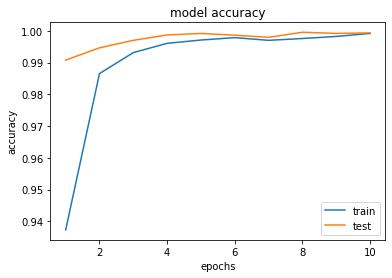

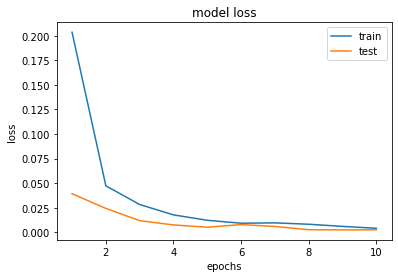

In [54]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## 평가

In [55]:
#테스트 데이터 자연어 -> 정수 인코딩
X_test =tokenizer.texts_to_sequences(X_test)
#테스트 데이터 패딩 진행
X_test =pad_sequences(X_test, maxlen=max_len)

In [56]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.argmax(axis=-1) 

In [57]:
# 정수 시퀀스를 레이블에 해당하는 텍스트 시퀀스로 변환
y_predicted =idx_encode.inverse_transform(y_predicted)
# 정수 시퀀스를 레이블에 해당하는 텍스트 시퀀스로 변환
y_test =idx_encode.inverse_transform(y_test)

In [58]:
print('accuracy: ', sum(y_predicted == y_test) / len(y_test))
print("Precision, Recall and F1-Score:\n\n", classification_report(y_test, y_predicted))

accuracy:  0.9883333333333333
Precision, Recall and F1-Score:

                       precision    recall  f1-score   support

       AddToPlaylist       1.00      1.00      1.00       100
      BookRestaurant       1.00      1.00      1.00       100
          GetWeather       1.00      1.00      1.00       100
            RateBook       1.00      1.00      1.00       100
  SearchCreativeWork       0.93      1.00      0.97       100
SearchScreeningEvent       1.00      0.93      0.96       100

            accuracy                           0.99       600
           macro avg       0.99      0.99      0.99       600
        weighted avg       0.99      0.99      0.99       600

